# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classificaiton problems.

A classification is where you try to classify something as one thing or another.

A few types od classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


## crating data to view and fit

In [32]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.003,
                    random_state=42)

In [33]:
# Check out features
X

array([[ 0.77049941,  0.21095396],
       [-0.78602977,  0.13242465],
       [-0.79586178,  0.10756813],
       ...,
       [-0.14860458, -0.788248  ],
       [ 0.68312855, -0.73282192],
       [ 0.284623  ,  0.95905205]])

In [34]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand right now.. let's visualize it!

In [35]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.770499,0.210954,1
1,-0.786030,0.132425,1
2,-0.795862,0.107568,1
3,-0.345934,0.720764,1
4,0.437625,-0.899137,0
...,...,...,...
995,0.237255,0.968881,0
996,-0.969590,-0.251058,0
997,-0.148605,-0.788248,1
998,0.683129,-0.732822,0


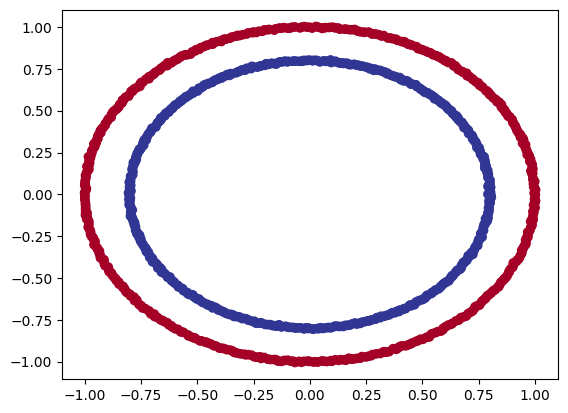

In [36]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

⚒ **Exercise:** before pushing forward, spend 10-minutes playing around with https://playground.tensorflow.org/ building and running different neural networks. See what happens when you change different hyperparameters.

## Input and Output shapes

In [37]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [38]:
# How many samples we're woorking
len(X), len(y)

(1000, 1000)

In [39]:
# View the first example of features and labels
X[0], y[0]
X[10], y[10]

(array([-0.58287154, -0.55384031]), 1)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [40]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.18.0'

In [41]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequenctial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4625 - loss: 4.3217
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4676 - loss: 3.4175
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5090 - loss: 0.7594
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5084 - loss: 0.7094
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5099 - loss: 0.6979


In [42]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4885 - loss: 0.6927  


[0.6932887434959412, 0.4740000069141388]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy ... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [44]:
# 4 .Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4152 - loss: 0.6929  


[0.6934473514556885, 0.4269999861717224]

In [45]:
circles["label"].value_counts()

,count
label,
1,500
0,500


## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the numbers of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization fucntion such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [46]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #add 100 dense neurons
    tf.keras.layers.Dense(10), #add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [47]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5237 - loss: 0.6918  


[0.693528413772583, 0.49799999594688416]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make a predicitions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [48]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function swas inspired by two resources:
  https://cs231n.github.io/neural-networks-case-study/
  https://github.com/GokuMohandas/Made-With-ML/tree/main/notebooks
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


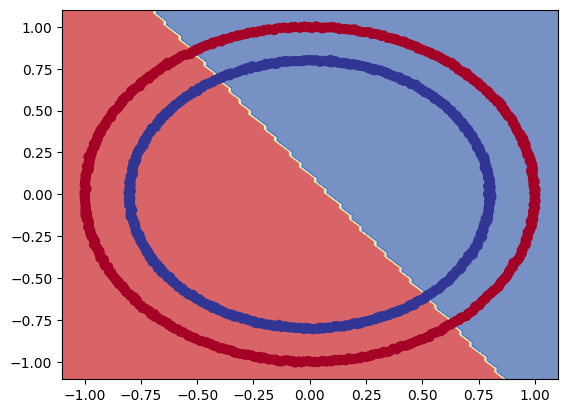

In [49]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [50]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test= X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit out model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_12_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [57]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 433.7196 - mae: 433.7196
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 295.4384 - mae: 295.4384 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 153.7445 - mae: 153.7445 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.7408 - mae: 47.7408 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89.4943 - mae: 89.4943 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.2994 - mae: 73.2994  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.2215 - mae: 44.2215 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.4848 - mae: 52.4848 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.4860 - mae: 41.4860 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.7460 - mae: 45.7460 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.6190 - mae: 40.6190 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.9185 - mae: 41.9185 
Epoch 13/100
5/5 ━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 


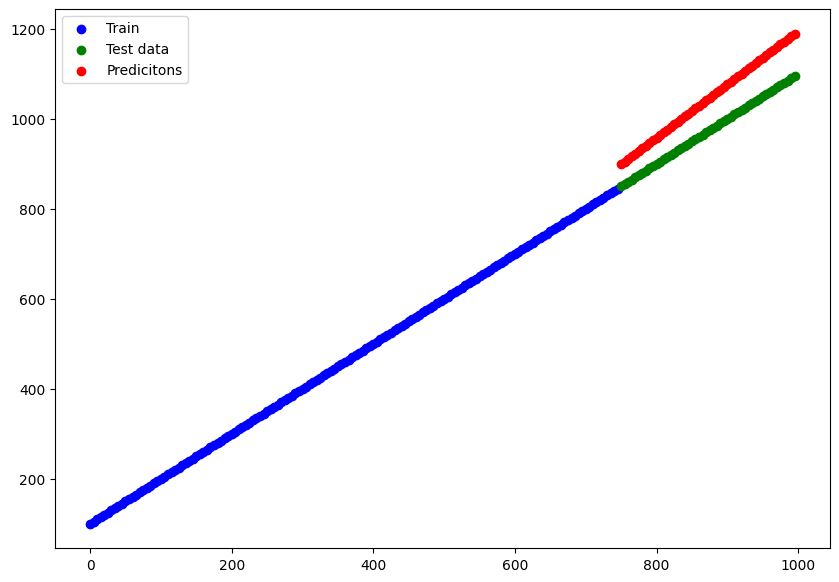

In [61]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Train")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predicitons")
plt.legend()

## The missing piece: Non-linearity

In [52]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.0999935751351104,
 1.102731700631164,
 -1.105000887412629,
 1.1032315507631159)

In [53]:
model_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)